In [ ]:
from bliss.datasets.galsim_blends import generate_padded_tiles

In [ ]:
from astropy.table import Table
from bliss.datasets.table_utils import column_to_tensor
from bliss.datasets.lsst import prepare_final_galaxy_catalog, prepare_final_star_catalog
from bliss.datasets.lsst import get_default_lsst_psf

import matplotlib.pyplot as plt 


In [ ]:
_cat = Table.read('../../../data/OneDegSq.fits')
_star_mags = column_to_tensor(Table.read("../../../data/stars_med_june2018.fits"), "i_ab")
CATSIM_CAT = prepare_final_galaxy_catalog(_cat)
CATSIM_CAT = CATSIM_CAT[CATSIM_CAT['i_ab'] < 20]
STAR_MAGS = prepare_final_star_catalog(_star_mags)


In [ ]:

psf = get_default_lsst_psf()

In [ ]:
ds =generate_padded_tiles(1000, CATSIM_CAT, STAR_MAGS, psf, p_source_in=1., galaxy_prob=1.)

In [ ]:
ds['images'].shape, ds['uncentered_sources'].shape

(torch.Size([1000, 1, 52, 52]), torch.Size([1000, 1, 52, 52]))

In [ ]:
ds['tile_params']['galaxy_params'].squeeze()

tensor([[6.0158e-18, 3.7664e-16, 0.0000e+00,  ..., 2.8007e+02, 1.9987e+01,
         7.2310e+06],
        [1.1975e-14, 3.8032e-15, 0.0000e+00,  ..., 2.2032e+01, 1.5778e+01,
         3.4887e+08],
        [2.8514e-16, 1.8858e-17, 0.0000e+00,  ..., 3.2787e+02, 1.9999e+01,
         7.1524e+06],
        ...,
        [1.8805e-17, 1.2782e-15, 0.0000e+00,  ..., 3.4724e+02, 1.8722e+01,
         2.3173e+07],
        [3.4189e-18, 9.5624e-16, 0.0000e+00,  ..., 9.7815e-01, 1.9365e+01,
         1.2819e+07],
        [2.2204e-17, 7.8587e-16, 0.0000e+00,  ..., 3.2085e+02, 1.9714e+01,
         9.2984e+06]])

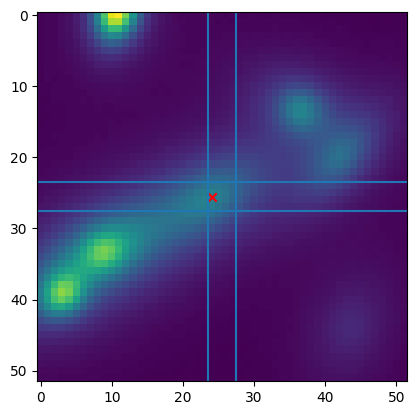

In [ ]:
import numpy as np
idx = np.random.choice(range(1000))
plt.imshow(ds['images'][idx, 0])
plt.axvline(24-0.5)
plt.axvline(28-0.5)

plt.axhline(24-0.5)
plt.axhline(28-0.5)

bp = 24
y, x = ds['tile_params']['locs'][idx]
plt.scatter(x*4+bp-0.5, y*4+bp-0.5, marker='x', color='r')

In [ ]:
ds['tile_params']['locs'][idx]

tensor([0.5304, 0.1536])